In [1]:
import numpy as np
# import sympy as symb
# from sympy import sin,cos
# from scipy.optimize import fsolve, root
import matplotlib.pyplot as plt
import copy

In [37]:
def iterate(delta=0.1,type='jacobi',w=0.0):
    # dt = 0.05 # delta t
    dy = delta
    dz = delta
    ny = int(2./dy)+1   # 21 for 0.1 delta 41 for 0.05 delta
    nk = int(1./dz)+1   # point number
    iter_num = 1000
    # tstep = 100 # total ready time steps
    nu = 1e-6
    theta = 0.08
    g     = 9.8
    # init condition
    #   use 0-20 or 0-40
    u = np.zeros([iter_num, ny, nk])  
    # f_interm = np.
    # empty[nx+2,ny+2]
    # ind maximum difference between iteratioins

    # jacobi
    abs_err = []
    for iter_ind in range(0,iter_num-1):
        for j in range(1,ny-1):
            for k in range(1,nk-1):
                # for jacobi
                if(type=='jacobi'):
                    u[iter_ind+1, j, k] = 0.25*(u[iter_ind, j-1, k] + u[iter_ind, j+1, k] + u[iter_ind, j, k+1] + u[iter_ind, j,k-1] )+ 0.25 * g * np.sin(theta) * dy*dz/nu
                if(type=='gs'):
                    u[iter_ind+1, j, k] = 0.25*(u[iter_ind+1, j-1, k] + u[iter_ind, j+1, k] + u[iter_ind, j, k+1] + u[iter_ind+1, j, k-1] )+ 0.25 * g * np.sin(theta) * dy*dz/nu
                if(type=='sor'):
                    u[iter_ind+1, j, k] = w * 0.25* ( (u[iter_ind+1, j-1, k] + u[iter_ind, j+1, k] + u[iter_ind, j, k+1] + u[iter_ind+1, j, k-1] )+ g * np.sin(theta) * dy*dz/nu ) + (1-w) * u[iter_ind, j, k]
                # for 
        # call B.C. 
        u[0, :]    = 0.
        u[ny-1, :] = 0.
        u[:, 0]    = 0.
        # u[:, nk -1 ]    = 0.
        # one way flux
        u[0, :]    = u[1, :]
        u[ny-1, :] = u[ny-2, :]
        u[:, 0]    = u[:, 1]
        u[:, nk -1]= u[:, nk - 2]
        # find err
        abs_err.append(np.max(np.abs(u[iter_ind+1,0:21,0:21] - u[iter_ind,0:21,0:21])))
        # if(np.abs(abs_err[iter_ind])<0.001 and ind_jacobi==-1):
            # ind_jacobi = iter_ind
            # print(ind_jacobi)
            # break
    ind_err = 0
    for i in np.array(abs_err):
        ind_err = ind_err + 1 
        if(i<0.001 and i!=0):
            break
    
    # return list by order
    return [u,ind_err,abs_err]


In [38]:
[u,ind_err,abs_err] = iterate(type='sor',w=1.7)
ind_err

48

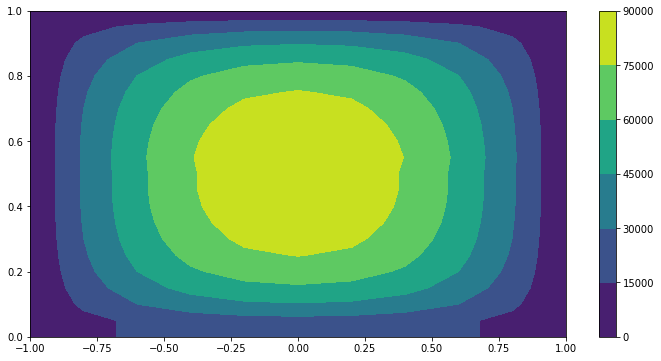

In [39]:
import matplotlib as mpl
fig,ax = plt.subplots(1,1,figsize=(12,6))
# levels_bnd = [0,0.1,0.2,0.3,0.4,0.5,0.6,1]
# levels_bnd = np.linspace(0,1.5,16)
# cnrt1 = ax[0].contour(np.linspace(-1,1,21),np.linspace(-1,1,21),,levels = levels_bnd,vmin=0,vmax=1,colors="k")
cnrt1 = ax.contourf(np.linspace(-1,1,11),np.linspace(0,1,21),u[199,:,:])
# cnrt2 = ax[1].contour(np.linspace(-1,1,21),np.linspace(-1,1,21),phi[5,1:22,1:22],levels = levels_bnd,vmin=0,vmax=1,colors="k")
# cnrt3 = ax[2].contour(np.linspace(-1,1,21),np.linspace(-1,1,21),phi[20,1:22,1:22],levels = levels_bnd,vmin=0,vmax=1,colors="k")
# ax[0].clabel(cnrt1,fontsize=10,fmt='%4.1f')
# ax[1].clabel(cnrt2,fontsize=10,fmt='%4.1f')
# ax[2].clabel(cnrt3,fontsize=10,fmt='%4.1f')
# ax1 = ax[1].contourf(np.linspace(0,domainlx,gridnx),np.linspace(0,domainly,gridny),c[:,:,int(1./deltat)],levels = 10,cmap="RdBu_r",norm = norm,vmin=0,vmax=0.8,level=6)
# im = ax.imshow(data, cmap='bone')
# im.clim(vmin=0,vmax=70)
# plt.colorbar(cnrt1,ax=ax,label='BOD',ticks=np.linspace(0,100,11))
plt.colorbar(cnrt1,ax=ax)
# plt.clim(0,70)
# bound = [0, 10, 20, 40 ,50 ,70]
# ax[0].set_xlabel('x')
# for axi in ax:
    # axi.set_xlabel('x')
    # ax[0].set_ylabel('y')
    # axi.set_ylabel('y')
# ax[0].set_title('t=0.05s')
# ax[1].set_title('t=0.25s')
# ax[2].set_title('t=1.00s')